### Prepare Problem

Predicting House Price in King's County with the avilable features. 

###### Load libraries and dataset

In [85]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# load king county house dataset
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.shape

(21613, 21)

### Step 2: Exploratory Data Analysis

###### Summarize and prepare data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


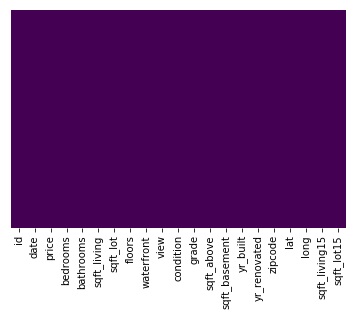

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df_ids = df.groupby(by='id').agg({'date':'count'})
print('Number of houses sold totally in 2014-2015: ', len(df.id.unique()))
print('Number of houses sold only once in 2014-2015: ', len(df_ids[df_ids.date == 1]))
print('Number of houses sold twice in 2014-2015: ', len(df_ids[df_ids.date == 2]))
print('Number of houses sold thrice in 2014-2015: ', len(df_ids[df_ids.date == 3]))

Number of houses sold totally in 2014-2015:  21436
Number of houses sold only once in 2014-2015:  21260
Number of houses sold twice in 2014-2015:  175
Number of houses sold thrice in 2014-2015:  1


In [7]:
df[df.id.isin(df_ids[df_ids.date > 1].index)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
345,3969300030,20140723T000000,165000.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
371,2231500030,20141001T000000,315000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929


###### Observation on 'id' column

1. 'id' acts as the identifier for the house/unit.
2. Between 2014 and 2015, 176 houses are sold more than once. And almost all these 176 were sold with higher price on 2015
3. So, it's better to include the year also as a factor in modelling
4. this column could be ignored for modelling

In [8]:
df['sold_year'] = df.date.str.slice(0,4)
df.sold_year = df.sold_year.astype('int64')

In [9]:
from collections import Counter
Counter(df.sold_year)

Counter({2014: 14633, 2015: 6980})

In [10]:
df['sold_month'] = df.date.str.slice(4,6)
df.sold_month = df.sold_month.astype('int64')

In [11]:
from collections import Counter
Counter(df.sold_month)

Counter({10: 1878,
         12: 1471,
         2: 1250,
         5: 2414,
         6: 2180,
         1: 978,
         4: 2231,
         3: 1875,
         7: 2211,
         8: 1940,
         11: 1411,
         9: 1774})

In [12]:
df['price_k'] = df['price']/1000
df.groupby(by=['sold_year','sold_month']).agg({'price_k':'mean'})

price_k
sold_year sold_month            
2014      5           548.080277
          6           558.002200
          7           544.788764
          8           536.445277
          9           529.253822
          10          539.026972
          11          521.961009
          12          524.461867
2015      1           525.870890
          2           507.851371
          3           543.977187
          4           561.837775
          5           558.126811

In [13]:
indices = df[df.sold_year == 2015].index
df.loc[indices,'sold_month'] = df.loc[indices,'sold_month']+12

In [14]:
df.groupby(by=['sold_month']).agg({'price_k':'mean'})

,price_k
sold_month,
5,548.080277
6,558.002200
7,544.788764
8,536.445277
9,529.253822
10,539.026972
11,521.961009
12,524.461867
13,525.870890


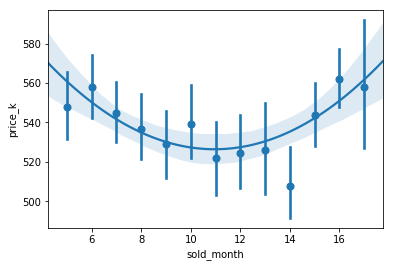

In [15]:
sns.regplot(x='sold_month',y='price_k', data=df, x_estimator=np.mean, order=2)

###### Observation on 'year' column

1. 'year' - sold year. here in this dataset it's between 5/2014 and 5/2015 
2. The average price per month is not showing a clear linear relationship, but we can see a pattern with price.
3. But from our previous 'id' observation, we can see that price generally increases with year (when the same house is sold on 2014 and 2015). So, made the months incremental to give some rank to the months. 
4. Now we can consider 'sold_month' alone while modelling

In [16]:
df.price_k.describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price_k, dtype: float64

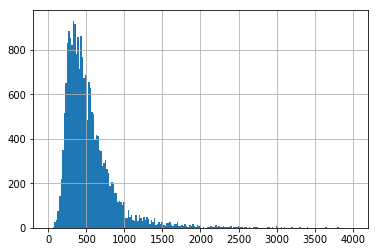

In [17]:
df.price_k.hist(bins=np.linspace(0,4000,200))

###### Observation on 'price' column

1. 'price' is converted in k(1000) as 'price_k'. This is the target variable
2. Being the target variable, we dont need to handle outliers for this variable
3. Distribution seems to be normal, though there is heavy right skewness

In [18]:
df.groupby(by=['bedrooms']).agg({'price_k':'mean'})

,price_k
bedrooms,
0,409.503846
1,317.642884
2,401.372682
3,466.232078
4,635.419504
5,786.599829
6,825.520636
7,951.184658
8,1105.076923


In [19]:
df.groupby(by=['bedrooms']).agg({'price_k':'count'})

,price_k
bedrooms,
0,13
1,199
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13


In [20]:
df[df.bedrooms.isin([0,10,11,33])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,price_k
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,1095.00
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,2015,14,380.00
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,1999,0,98125,47.7222,-122.290,1430,1650,2014,8,288.00
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,1953,0,98118,47.5260,-122.261,2170,6000,2014,10,228.00
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,2014,6,1295.65
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,1985,0,98042,47.3473,-122.151,2500,8751,2014,11,339.95
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,2003,0,98038,47.3493,-122.053,1810,5685,2014,9,240.00
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,1918,1999,98106,47.5560,-122.363,1420,4960,2014,8,520.00
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2015,16,355.00
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,2014,12,235.00


In [21]:
indices = df[df.bedrooms.isin([0,10,11,33])].index
df.drop(index=indices, inplace=True)
df.reset_index()
df.groupby(by=['bedrooms']).agg({'price_k':'count'})

,price_k
bedrooms,
1,199
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13
9,6


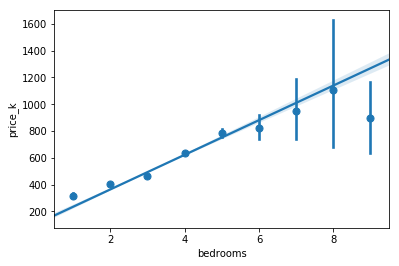

In [22]:
sns.regplot(x="bedrooms", y="price_k", data=df, x_estimator=np.mean);

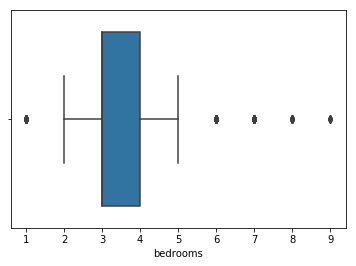

In [23]:
sns.boxplot(df.bedrooms)

###### Observation on 'bedrooms' column

1. 'bedrooms' - number of bedrooms
2. The houses with 0 bedrooms and 0 bathrooms, cant be considered the right fit for a house. And as the houses with 0 bedrooms and 0 bathrooms are negligible (13 out of 21613). So, these data are dropped
3. The houses with 33 bedrooms seems to be bad data. So, dropped that too.
4. The house with 10 bedroom could be an outlier, pushing the linear relationship down. As the record count is also very less (3), that's also dropped
5. Not going to drop the outliers shown in boxplot, as i think these data are needed for the proce prediction. Will decide to treat outliers if in case accuracy needs to be improved.
6. Considering the price increase pattern, we can see a good linear relationship with price

In [24]:
df.groupby(by=['bathrooms']).agg({'price':'count', 'price_k':'mean'})

,price,price_k
bathrooms,,
0.00,3,279.666667
0.50,4,237.375000
0.75,71,294.936648
1.00,3851,347.072147
1.25,9,621.216667
1.50,1445,409.406167
1.75,3047,454.835347
2.00,1929,457.790128
2.25,2047,533.676774


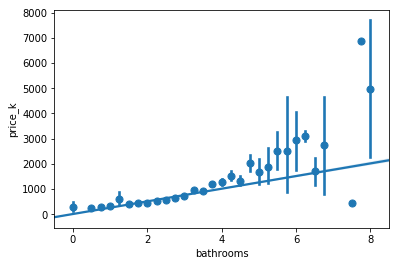

In [25]:
sns.regplot(x="bathrooms", y="price_k", data=df, x_estimator=np.mean);

In [26]:
df[df.bathrooms.isin([0,7.50])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,price_k
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,1966,0,98022,47.2638,-121.906,1160,42882,2015,14,75.0
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,1950,0,98045,47.5316,-121.749,990,22549,2014,11,280.0
8546,424049043,20140811T000000,450000.0,9,7.5,4050,6504,2.0,0,0,...,1996,0,98144,47.5923,-122.301,1448,3866,2014,8,450.0
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,1948,0,98053,47.6429,-121.955,1690,19290,2014,9,484.0


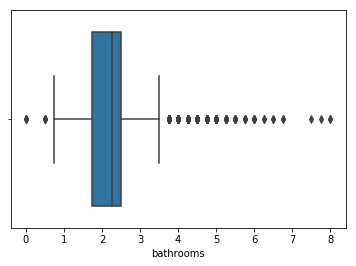

In [27]:
sns.boxplot(df.bathrooms)

###### Observation on 'bathrooms' column

1. 'bathrooms' - number of bathrooms
2. By looking at the data of the houses with 0 bathrooms, they seems to be a proper data 
3. The houses with 7.5 bathrooms seems to be an outlier. But, the data sounds good. So keeping the data.
4. As data seems to be valid, i am not removing outliers as mentioned by boxplot. will handle later based on model accuracy
5. Considering the price increase pattern, we can see a good linear relationship with price

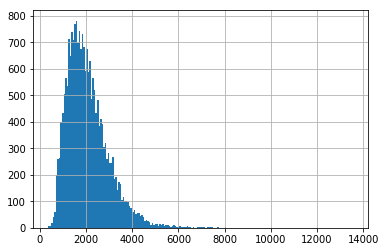

In [28]:
df.sqft_living.hist(bins=200)

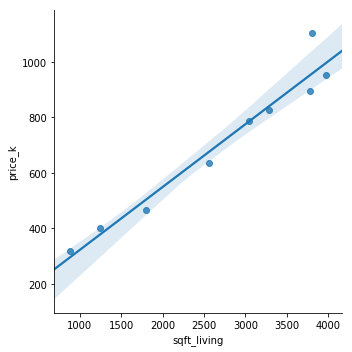

In [29]:
df_sqft_lvng = df.groupby(by=['bedrooms']).agg({'sqft_living':'mean','price_k':'mean'})
df_sqft_lvng['bedrooms'] = df_sqft_lvng.index
sns.lmplot(x='sqft_living',y='price_k',data=df_sqft_lvng)

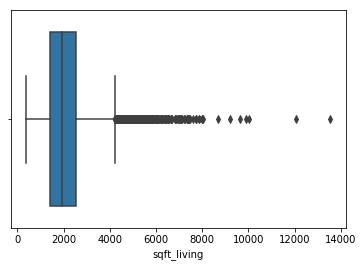

In [30]:
sns.boxplot(df.sqft_living)

In [31]:
df_sqft_lvng

,sqft_living,price_k,bedrooms
bedrooms,,,
1,884.613065,317.642884,1
2,1239.752899,401.372682,2
3,1805.837235,466.232078,3
4,2554.649666,635.419504,4
5,3047.545284,786.599829,5
6,3284.341912,825.520636,6
7,3974.210526,951.184658,7
8,3800.000000,1105.076923,8
9,3775.000000,893.999833,9


In [32]:
indices = df[df.bedrooms == 9].index
df.drop(index=indices, inplace=True)
df.reset_index()
print("As bedroom seems to be an outlier considering the sq feet, it's removed")

As bedroom seems to be an outlier considering the sq feet, it's removed


###### Observation on 'sqft_living' column

1. 'sqft_living' - sq feet of living space in the house 
2. sqft has shows good linear relationship with price 
3. Generally, number of bedrooms will be depnedent on sq ft of living space. So, these should be dependent on each other. That's clear in the above dataset.

In [33]:
sqft_lot = df.sqft_lot/1000
sqft_lot.describe()

count    21589.000000
mean        15.105963
std         41.420338
min          0.520000
25%          5.040000
50%          7.620000
75%         10.689000
max       1651.359000
Name: sqft_lot, dtype: float64

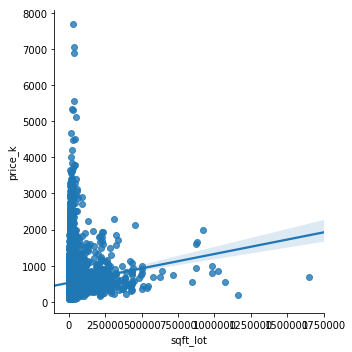

In [34]:
sns.lmplot(x='sqft_lot',y='price_k',data=df)

###### Observation on 'sqft_lot' column

1. 'sqft_lot' - sq feet of lot space in the house 
2. sqft does not show any linear relationship with price 
3. This data could be the least significant in determining the house price.

In [35]:
df.groupby(by=['floors']).agg({'sqft_living':'mean','price_k':'mean','id':'count'})

,sqft_living,price_k,id
floors,,,
1.0,1732.059116,442.189077,10674
1.5,1907.880628,558.980643,1910
2.0,2570.715970,648.946582,8228
2.5,3131.849057,1061.105572,159
3.0,1789.418985,583.339545,611
3.5,2440.000000,910.214286,7


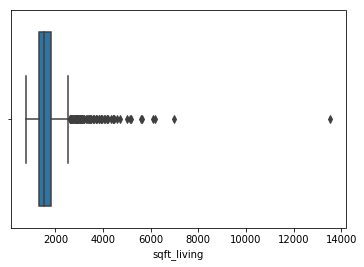

In [36]:
sns.boxplot(df[df.floors == 3.0]['sqft_living'])

In [37]:
# There seems to be lots of data that are outside the box. Lets investigate
df[(df.floors == 3.0) & (df.sqft_living > 4000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,price_k
1848,3271800295,20150203T000000,1569500.0,5,4.50,5620,5800,3.0,0,3,...,1999,0,98199,47.6482,-122.412,2360,5800,2015,14,1569.50
1931,5379804150,20150211T000000,598800.0,6,4.00,4470,17877,3.0,0,3,...,2013,0,98188,47.4514,-122.273,1790,18260,2015,14,598.80
4486,1724069059,20140524T000000,2000000.0,5,4.00,4580,4443,3.0,1,4,...,2004,0,98075,47.5682,-122.059,2710,4443,2014,5,2000.00
5850,3585900500,20150402T000000,1525000.0,4,4.25,4720,21000,3.0,0,4,...,1971,0,98177,47.7591,-122.376,3010,20000,2015,16,1525.00
6855,1102000527,20140902T000000,1437500.0,4,3.75,4410,9231,3.0,0,3,...,2001,0,98118,47.5427,-122.265,2160,6600,2014,9,1437.50
8174,9279700150,20150212T000000,1625000.0,4,3.75,4410,8112,3.0,0,4,...,2003,0,98116,47.5888,-122.392,2770,5750,2015,14,1625.00
10817,4139480350,20150113T000000,1688000.0,4,4.00,5000,12941,3.0,0,2,...,2002,0,98006,47.5500,-122.103,4560,12941,2015,13,1688.00
10951,853600310,20140828T000000,1610000.0,5,4.50,6085,142725,3.0,0,0,...,2000,0,98014,47.6085,-121.952,4830,128457,2014,8,1610.00
11233,2655500241,20140814T000000,1699000.0,3,3.25,4160,35153,3.0,0,2,...,2001,0,98040,47.5749,-122.214,3290,11533,2014,8,1699.00
11540,2771600550,20141112T000000,950000.0,4,3.50,4030,4200,3.0,0,0,...,1992,0,98199,47.6416,-122.386,2130,5000,2014,11,950.00


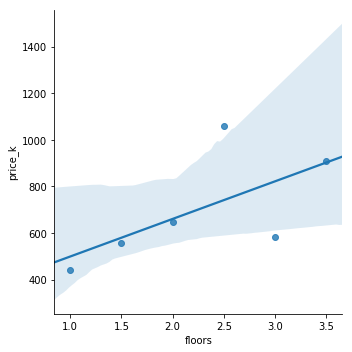

In [38]:
df_floors = df.groupby(by=['floors']).agg({'sqft_living':'mean','price_k':'mean'})
df_floors['floors'] = df_floors.index
sns.lmplot(x='floors',y='price_k',data=df_floors)

###### Observation on 'floors' column

1. 'floors' - number of floors in the house 
2. Generally floors, number of bedrooms and sq_living should be related to each other.
3. We could see some linear relationship with price too 

In [39]:
Counter(df.waterfront)

Counter({0: 21426, 1: 163})

In [40]:
df.groupby(by=['bedrooms','waterfront']).agg({'price_k':'mean'})

price_k
bedrooms waterfront             
1        0            309.781103
         1            622.680000
2        0            395.497622
         1            918.567484
3        0            459.279999
         1           1526.424219
4        0            627.859928
         1           1928.485000
5        0            762.771856
         1           2770.592105
6        0            793.718705
         1           2956.250000
7        0            951.184658
8        0           1105.076923

### Observations on 'waterfront' column

1. waterfront - 0 indicates absence, 1 indicates presence of waterfront view in the house
2. By looking at the aggregate, houses with same number of bedrooms show better selling price if they have waterfront view
3. So, waterfront must be a good feature in price determination

In [41]:
Counter(df.view)

Counter({0: 19468, 3: 510, 4: 319, 2: 960, 1: 332})

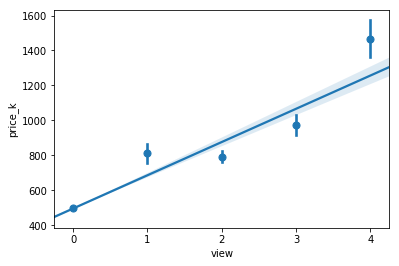

In [42]:
sns.regplot(x='view',y='price_k', data=df, x_estimator=np.mean)

### Observations on 'view' column

1. view - number of views the house got (thats what i have understood)
2. By looking at the aggregate, views has seems to be a good predictor for price

In [43]:
Counter(df.condition)

Counter({3: 14013, 5: 1700, 4: 5676, 1: 29, 2: 171})

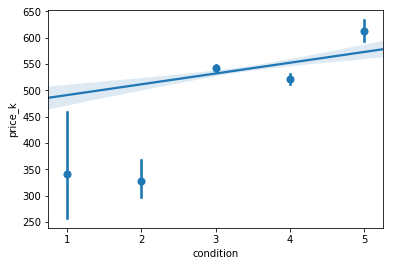

In [44]:
sns.regplot(x='condition',y='price_k', data=df, x_estimator=np.mean)

In [45]:
Counter(df.grade)

Counter({7: 8967,
         6: 2038,
         8: 6064,
         11: 398,
         9: 2614,
         5: 242,
         10: 1134,
         12: 89,
         4: 27,
         3: 3,
         13: 13})

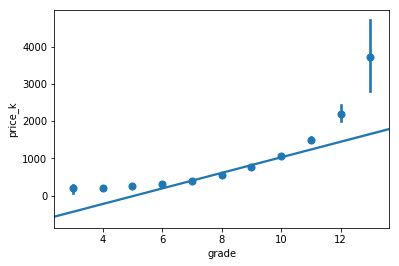

In [46]:
sns.regplot(x='grade',y='price_k', data=df, x_estimator=np.mean)

### Observation on 'condition' and 'grade' columns

1. Both condition and grade shows how good the house is
2. We can see both showing some linear relationship to price

In [47]:
# As sqft_living = sqft_above + sqft_basement and we already analysed the impact of sqft_living, 
# I am changing the significance of basement by just its presence
df['has_basement'] = df.sqft_basement
indices = df[df.sqft_basement > 0].index
df.loc[indices,'has_basement'] = 1

In [48]:
Counter(df.has_basement)

Counter({0: 13112, 1: 8477})

In [49]:
df.groupby(by=['bedrooms','has_basement']).agg({'price_k':'mean'})

price_k
bedrooms has_basement             
1        0              302.922226
         1              397.419355
2        0              367.818443
         1              482.010428
3        0              429.349783
         1              531.014112
4        0              596.382373
         1              689.989877
5        0              750.896631
         1              809.164541
6        0              667.483412
         1              897.355738
7        0              754.201063
         1             1094.445455
8        0             1261.500000
         1             1076.636364

### Observation on 'sqft_above' and 'sqft_basement' columns

1. sqft_living = sqft_above + sqft_basement
2. Created a new column 'has_basement', that has good price determining factor

In [50]:
df['age'] = df.sold_year - df.yr_built
df.age.unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

In [51]:
indices = df[(df.yr_built > df.sold_year)].index
df.loc[indices,'age'] = 0

In [52]:
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [53]:
df['age_renovated'] = df.yr_renovated
indices = df[(df.age_renovated == 0)].index
df.loc[indices,'age_renovated'] = 2016
df.age_renovated = df.sold_year - df.age_renovated

In [54]:
indices = df[(df.age_renovated < 0)].index
df.loc[indices,'age_renovated'] = 0

In [55]:
df.age_renovated.unique()

array([ 0, 23, 12,  4, 15,  1, 20, 24, 37, 10,  7, 11, 21, 30, 31, 60,  3,
       40, 16,  9, 69, 25, 26, 57, 33, 13, 36, 14, 38, 19, 45, 28, 22,  5,
        8, 41, 29, 34, 43, 70, 35, 18, 65, 46, 66,  6, 32, 44,  2, 27, 51,
       17, 64, 52, 61, 59, 74, 56, 50, 53, 39, 55, 42, 54, 58, 48, 47, 49,
       80, 68], dtype=int64)

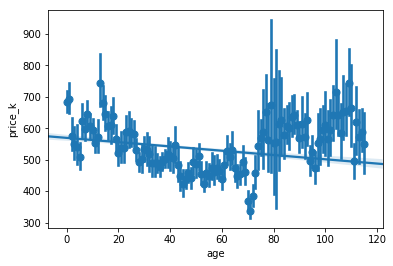

In [56]:
sns.regplot(x='age',y='price_k', data=df, x_estimator=np.mean)

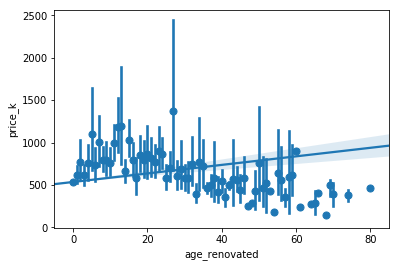

In [57]:
sns.regplot(x='age_renovated',y='price_k', data=df, x_estimator=np.mean)

### Observation on 'yr_built' and 'yr_renovated' columns

1. year built and year renovated are converted to age for better prediction factor

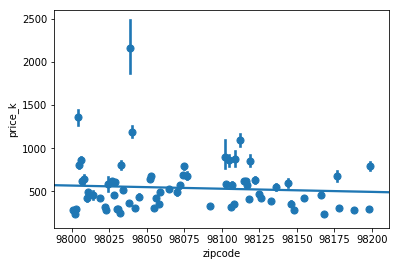

In [58]:
sns.regplot(x='zipcode',y='price_k', data=df, x_estimator=np.mean)

In [59]:
df.lat.describe()

count    21589.000000
mean        47.560044
std          0.138579
min         47.155900
25%         47.470900
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [60]:
df.long.describe()

count    21589.000000
mean      -122.213897
std          0.140793
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

### Observation on 'zipcode', 'lat' and 'long' columns

1. As we deal with a single county data, the location details will have less significance in determining the price.

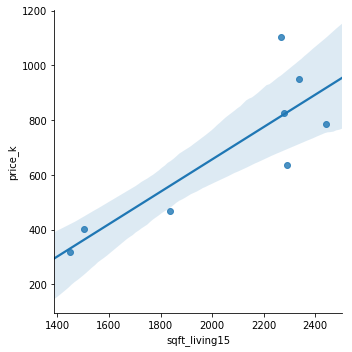

In [61]:
df_sqft_lvng15 = df.groupby(by=['bedrooms']).agg({'sqft_living15':'mean','price_k':'mean'})
df_sqft_lvng15['bedrooms'] = df_sqft_lvng15.index
sns.lmplot(x='sqft_living15',y='price_k',data=df_sqft_lvng15)

### Observation on 'sqft_living15' and  'sqft_lot15' columns

1. As we have already analysed sqft_living and lot data, we can decide on its significance based on the correlation

### Finding out important features

In [62]:
org_columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
               'floors','waterfront','view','condition','grade',
               'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
               'lat','long','sqft_living15','sqft_lot15'
              ]
df_org = df[org_columns]
df_org.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.32,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.61,0.32,0.055,0.13,-0.053,0.31,0.022,0.59,0.083
bedrooms,0.32,1.0,0.53,0.59,0.034,0.18,-0.0066,0.083,0.025,0.37,0.49,0.31,0.17,0.017,-0.16,-0.013,0.14,0.41,0.033
bathrooms,0.53,0.53,1.0,0.76,0.089,0.5,0.064,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.21,0.024,0.22,0.57,0.089
sqft_living,0.7,0.59,0.76,1.0,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.43,0.32,0.055,-0.2,0.052,0.24,0.76,0.18
sqft_lot,0.09,0.034,0.089,0.17,1.0,-0.0048,0.022,0.075,-0.0089,0.11,0.18,0.016,0.053,0.0078,-0.13,-0.086,0.23,0.14,0.72
floors,0.26,0.18,0.5,0.35,-0.0048,1.0,0.024,0.029,-0.26,0.46,0.52,-0.25,0.49,0.0061,-0.06,0.049,0.13,0.28,-0.011
waterfront,0.27,-0.0066,0.064,0.1,0.022,0.024,1.0,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.014,-0.042,0.087,0.031
view,0.4,0.083,0.19,0.28,0.075,0.029,0.4,1.0,0.046,0.25,0.17,0.28,-0.054,0.1,0.085,0.006,-0.078,0.28,0.073
condition,0.036,0.025,-0.13,-0.059,-0.0089,-0.26,0.017,0.046,1.0,-0.15,-0.16,0.17,-0.36,-0.061,0.003,-0.015,-0.11,-0.093,-0.0032
grade,0.67,0.37,0.67,0.76,0.11,0.46,0.083,0.25,-0.15,1.0,0.76,0.17,0.45,0.014,-0.19,0.11,0.2,0.71,0.12


###### Lets infer correlation of original columns
1. bathrooms, bedrooms, sqft_living, sqft_living15, sqft_above, grade are showing correlation
2. price shows good correlation with sqft_living, sqft_above and grade
3. we can remove these features as they show very low correlation (< 0.05) - condition, long

### Build a model

###### Build a linear regression model to predict the house prices

In [63]:
org_columns1 = ['bedrooms','bathrooms','sqft_living','sqft_lot',
               'floors','waterfront','view','grade',
               'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
               'lat','sqft_living15','sqft_lot15'
              ]

X = df_org[org_columns1]
Y = df_org['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
#coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
#coeff_df
Y_pred = lr.predict(X_test)
print('R2 Score:',metrics.r2_score(Y_test, Y_pred))

R2 Score: 0.6787264472470085


### Trying to improve the accuracy by using the transformed features

In [64]:
columns = ['sold_year','sold_month','price','bedrooms','bathrooms','sqft_living','sqft_lot',
           'floors','waterfront','view','condition','grade','has_basement','age','age_renovated',
           'zipcode','lat','long','sqft_living15','sqft_lot15']
df_new = df[columns]

In [65]:
df_new.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,sold_year,sold_month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,has_basement,age,age_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
sold_year,1.0,0.85,0.0036,-0.0089,-0.026,-0.029,0.0057,-0.022,-0.0042,0.0013,-0.046,-0.031,-0.0069,0.012,-0.013,0.0012,-0.029,0.0003,-0.022,0.00022
sold_month,0.85,1.0,-0.0028,-0.014,-0.034,-0.034,0.0063,-0.022,0.00053,-0.0026,-0.05,-0.039,-0.0057,0.013,-0.013,0.0018,-0.031,-0.0065,-0.031,0.003
price,0.0036,-0.0028,1.0,0.32,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.18,-0.054,0.067,-0.053,0.31,0.022,0.59,0.083
bedrooms,-0.0089,-0.014,0.32,1.0,0.53,0.59,0.034,0.18,-0.0066,0.083,0.025,0.37,0.16,-0.17,-0.011,-0.16,-0.013,0.14,0.41,0.033
bathrooms,-0.026,-0.034,0.53,0.53,1.0,0.76,0.089,0.5,0.064,0.19,-0.13,0.67,0.16,-0.51,-0.0016,-0.21,0.024,0.22,0.57,0.089
sqft_living,-0.029,-0.034,0.7,0.59,0.76,1.0,0.17,0.35,0.1,0.28,-0.059,0.76,0.2,-0.32,0.019,-0.2,0.052,0.24,0.76,0.18
sqft_lot,0.0057,0.0063,0.09,0.034,0.089,0.17,1.0,-0.0048,0.022,0.075,-0.0089,0.11,-0.035,-0.053,0.014,-0.13,-0.086,0.23,0.14,0.72
floors,-0.022,-0.022,0.26,0.18,0.5,0.35,-0.0048,1.0,0.024,0.029,-0.26,0.46,-0.26,-0.49,-0.0019,-0.06,0.049,0.13,0.28,-0.011
waterfront,-0.0042,0.00053,0.27,-0.0066,0.064,0.1,0.022,0.024,1.0,0.4,0.017,0.083,0.037,0.026,0.1,0.03,-0.014,-0.042,0.087,0.031
view,0.0013,-0.0026,0.4,0.083,0.19,0.28,0.075,0.029,0.4,1.0,0.046,0.25,0.18,0.054,0.091,0.085,0.006,-0.078,0.28,0.073


###### As observed earlier, we can infer the below points based on correlation map
1. bathrooms, bedrooms, sqft_living, sqft_living15, grade are showing correlation
2. price shows good correlation with sqft_living and grade
3. we can remove these features as they show very low correlation (< 0.05) - sold_year, sold_month, condition, long

In [66]:
x_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
             'waterfront','view','grade','has_basement','age','age_renovated',
             'zipcode','lat','long',
             'sqft_living15','sqft_lot15']
y_column = 'price'

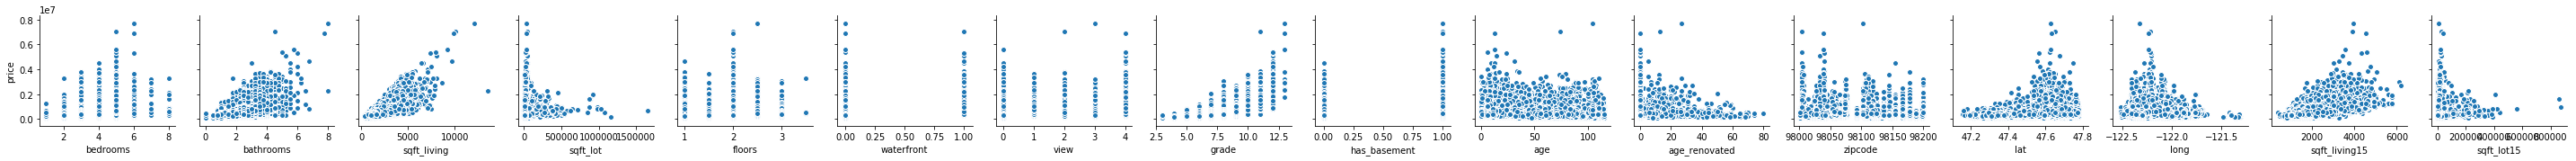

In [67]:
pp = sns.pairplot(data=df_new,y_vars=[y_column],x_vars=x_columns)

In [68]:
X = df_new[x_columns]
Y = df_new[y_column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
#coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
#coeff_df
Y_pred = lr.predict(X_test)
print('R2 Score:',metrics.r2_score(Y_test, Y_pred))

R2 Score: 0.693588702304673


### Trying to improve the accuracy by standardizing the features

In [69]:
sc = StandardScaler()
#Standardizing X
X_std =  sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print('R2 Score:',metrics.r2_score(Y_test, Y_pred))

R2 Score: 0.6981998196237769


### Trying to improve accuracy by applying PCA

In [70]:
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

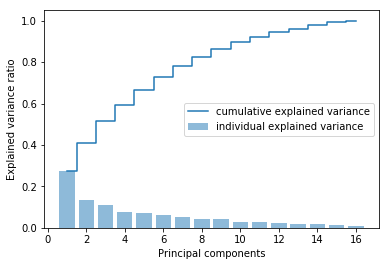

In [71]:
plt.bar(range(1,17), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,17),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [72]:
Proj_data_2D = np.dot(X_std,np.array(eigvectors_sorted).T)
X_train, X_test, Y_train, Y_test = train_test_split(Proj_data_2D, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print('R2 Score:',metrics.r2_score(Y_test, Y_pred))

R2 Score: 0.6956267377585221


### Trying to improve accuracy by treating outliers

In [73]:
def treat_outliers(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

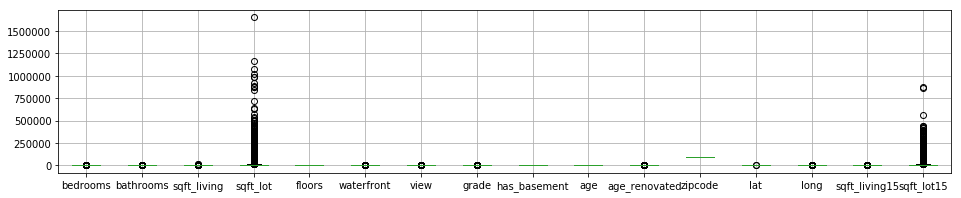

In [74]:
df_new.boxplot(column=x_columns, figsize=[16,3])

In [75]:
#Lots of outliers are around sqft_living
df_new1 = treat_outliers('sqft_lot', df_new)
df_new1 = treat_outliers('sqft_lot15', df_new1)
df_new1 = treat_outliers('bedrooms', df_new1)

In [76]:
df_new1.shape

(18184, 20)

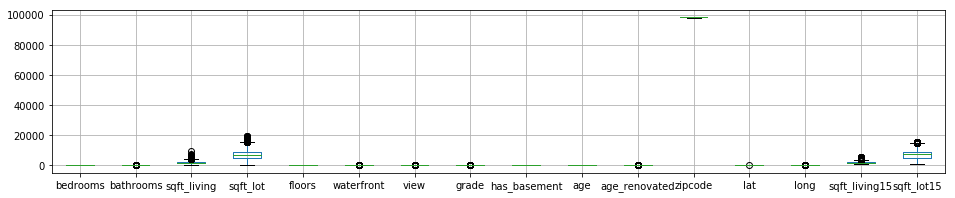

In [77]:
df_new1.boxplot(column=x_columns, figsize=[16,3])

In [78]:
X = df_new1[x_columns]
Y = df_new1[y_column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print('R2 Score:',metrics.r2_score(Y_test, Y_pred))

R2 Score: 0.7047128153579619


### Observation on Accuracy of linear model

###### Iteration 1: Built model on original features that were selected based on correlation matrix
###### Iteration 2: Built model on added/transformed features like age, sold_month, etc
###### Iteration 3: Built model on standardized features
###### Iteration 4: Built model after done PCA on features
###### Iteration 5: Built model after treating outliers on features

#### For all the iterations/models, the accuracy range was 70% (+- 3)




### Cross Validation Technique

In [127]:
X = df_org[org_columns1]
Y = df_org['price']
X_std =  sc.fit_transform(X)

##### Linear Regression

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test,Y_test)

0.7020242700518351

In [133]:
scores = cross_val_score(lr, X_std, Y, cv=5, scoring='mean_squared_error')
-scores.mean()

41807483157.2405

### KNN Regression

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn.score(X_test,Y_test)

0.7940707665174486

In [134]:
scores = cross_val_score(knn, X_std, Y, cv=5,scoring='mean_squared_error')
-scores.mean()

30490128575.77012

### Decision Tree Regression

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr.score(X_test,Y_test)

0.7024162983887243

In [136]:
scores = cross_val_score(dtr, X_std, Y, cv=5,scoring='mean_squared_error')
-scores.mean()

40766471987.02489

######  From different Regression models (LR, KNN, Tree), we found that out that KNN performed better as it had better score and least mean squared error

### Improving KNN Model

###### Finding best k-value

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 226765.14360217235
RMSE value for k=  2 is: 184624.62931275257
RMSE value for k=  3 is: 177320.3243167726
RMSE value for k=  4 is: 172752.55066754034
RMSE value for k=  5 is: 169290.5595325237
RMSE value for k=  6 is: 168516.08355788517
RMSE value for k=  7 is: 169310.90588140258
RMSE value for k=  8 is: 168785.7022331851
RMSE value for k=  9 is: 170429.83227466632
RMSE value for k=  10 is: 169180.84992138215
RMSE value for k=  11 is: 169277.98466240408
RMSE value for k=  12 is: 169154.64339918
RMSE value for k=  13 is: 170315.9755457182
RMSE value for k=  14 is: 170241.78966818406
RMSE value for k=  15 is: 170831.70701981595
RMSE value for k=  16 is: 170697.85499619565
RMSE value for k=  17 is: 171620.4140326711
RMSE value for k=  18 is: 171729.78364926524
RMSE value for k=  19 is: 171866.48849124793
RMSE value for k=  20 is: 172029.43243759457


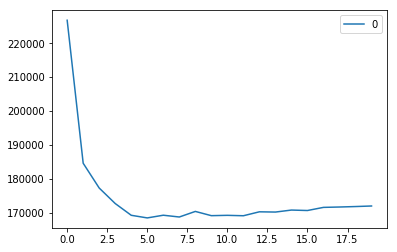

In [97]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [137]:
# When k=8, we get least mean squared error
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 10}

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=None)
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)
knn.score(X_test,Y_test)

0.7964417877504615

In [141]:
scores = cross_val_score(knn, X_std, Y, cv=5)
scores

array([0.76431272, 0.76554863, 0.77965934, 0.80471284, 0.76736094])